**Face mask dectection using Convolutional Neural Network (CNN)**

In [7]:
pip install kaggle

In [8]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [11]:
# API to fetch the dataset from kaggle
# ! - put '!' to download
# copy the API link from dataset kaggle site - kaggle datasets download -d omkargurav/face-mask-dataset
# kaggle datasets download -d omkargurav/face-mask-dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
# extracting the compessed dataset
from zipfile import ZipFile
ds = '/content/face-mask-dataset.zip'

In [13]:
with ZipFile(ds,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

# we get the extracted file in 'files'

The dataset is extracted


In [14]:
!ls
# to list the directory

data		       face-mask-detection.ipynb  sample_data
face-mask-dataset.zip  kaggle.json


**Importing the Dependencies**

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [16]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [17]:
with_mask_files[0:5]

['with_mask_341.jpg',
 'with_mask_3196.jpg',
 'with_mask_3383.jpg',
 'with_mask_1258.jpg',
 'with_mask_2301.jpg']

In [18]:
with_mask_files[-5:]

['with_mask_934.jpg',
 'with_mask_3194.jpg',
 'with_mask_3260.jpg',
 'with_mask_1512.jpg',
 'with_mask_3010.jpg']

In [19]:
without_mask_files[0:5]

['without_mask_831.jpg',
 'without_mask_1098.jpg',
 'without_mask_3099.jpg',
 'without_mask_3443.jpg',
 'without_mask_1223.jpg']

No. of with and without mask

In [20]:
print('No. of with mask images -->', len(with_mask_files))
print('No. of without mask images -->', len(without_mask_files))

No. of with mask images --> 3725
No. of without mask images --> 3828


create labels for with and without mask

with mask = 1    
without mask = 0

In [21]:
# create labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [22]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [23]:
without_mask_labels[0:5]

[0, 0, 0, 0, 0]

combine 2 sets

In [24]:
labels = with_mask_labels + without_mask_labels
labels[-5:]  # last 5 labels

[0, 0, 0, 0, 0]

In [25]:
labels[0:5]  # first 5 labels

[1, 1, 1, 1, 1]

In [26]:
len(labels)

7553

Display the images

<function matplotlib.pyplot.show(close=None, block=None)>

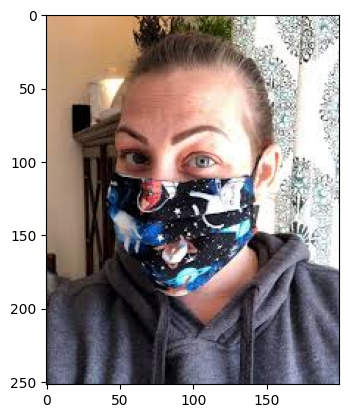

In [27]:
# displaying with_mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2489.jpg')
# 'with_mask_2489.jpg - copies from listdir()
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

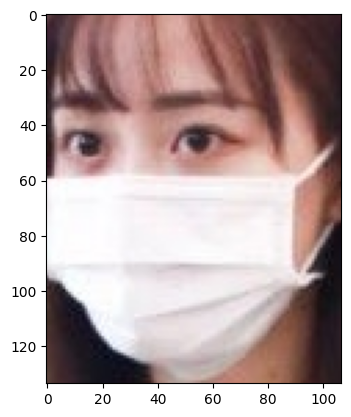

In [28]:
img = mpimg.imread('/content/data/with_mask/with_mask_549.jpg')
imgplot = plt.imshow(img)
plt.imshow

<function matplotlib.pyplot.show(close=None, block=None)>

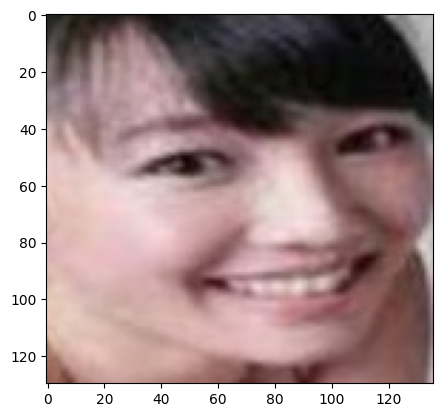

In [29]:
img = mpimg.imread('/content/data/without_mask/without_mask_2335.jpg')
imgplot = plt.imshow(img)
plt.show

Image processing

1. Resize image - shape of image is not same
2. Convert image to numpy array

In [30]:
# convert image to numpy array
with_mask_path = '/content/data/with_mask/'
# '/content/data/with_mask' : put / --> '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # we have colored img, but some figure in black & white color
  image = np.array(image)
  data.append(image)



# convert image to numpy array
without_mask_path = '/content/data/without_mask/'
# '/content/data/with_mask' : put / --> '/content/data/with_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # we have colored img, but some figure in black & white color
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [31]:
len(data)

7553

In [32]:
type(data)

list

In [33]:
data[0]

array([[[ 23,  15,  16],
        [ 21,  15,  15],
        [ 22,  16,  16],
        ...,
        [ 38,  30,  27],
        [ 33,  25,  22],
        [ 45,  36,  36]],

       [[ 23,  19,  17],
        [ 20,  18,  15],
        [ 19,  17,  15],
        ...,
        [ 33,  25,  20],
        [ 34,  26,  23],
        [ 35,  27,  24]],

       [[ 20,  21,  16],
        [ 19,  20,  15],
        [ 16,  17,  14],
        ...,
        [ 30,  23,  16],
        [ 33,  26,  19],
        [ 33,  25,  21]],

       ...,

       [[163, 171, 168],
        [155, 163, 157],
        [195, 202, 195],
        ...,
        [240, 220, 213],
        [240, 220, 213],
        [240, 220, 213]],

       [[ 94, 102, 100],
        [174, 181, 178],
        [226, 230, 224],
        ...,
        [239, 219, 212],
        [239, 219, 212],
        [239, 219, 212]],

       [[113, 119, 119],
        [205, 208, 208],
        [241, 240, 236],
        ...,
        [239, 219, 212],
        [238, 218, 211],
        [239, 219, 212]]

In [34]:
type(data[0])

numpy.ndarray

In [35]:
data[0].shape

(128, 128, 3)

In [36]:
# converting image list and label list to numpy array
x = np.array(data)
y = np.array(labels)

In [37]:
type(x)

numpy.ndarray

In [38]:
type(y)

numpy.ndarray

In [39]:
x.shape
# 3828 - no. of numpy array have in entire row
# 128 - height
# 128 - width of array
# 3 - color channel

(7553, 128, 128, 3)

In [40]:
y.shape

(7553,)

In [41]:
# y=y.reshape(y.shape[:3829])

In [42]:
y.shape

(7553,)

In [43]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
x

array([[[[ 23,  15,  16],
         [ 21,  15,  15],
         [ 22,  16,  16],
         ...,
         [ 38,  30,  27],
         [ 33,  25,  22],
         [ 45,  36,  36]],

        [[ 23,  19,  17],
         [ 20,  18,  15],
         [ 19,  17,  15],
         ...,
         [ 33,  25,  20],
         [ 34,  26,  23],
         [ 35,  27,  24]],

        [[ 20,  21,  16],
         [ 19,  20,  15],
         [ 16,  17,  14],
         ...,
         [ 30,  23,  16],
         [ 33,  26,  19],
         [ 33,  25,  21]],

        ...,

        [[163, 171, 168],
         [155, 163, 157],
         [195, 202, 195],
         ...,
         [240, 220, 213],
         [240, 220, 213],
         [240, 220, 213]],

        [[ 94, 102, 100],
         [174, 181, 178],
         [226, 230, 224],
         ...,
         [239, 219, 212],
         [239, 219, 212],
         [239, 219, 212]],

        [[113, 119, 119],
         [205, 208, 208],
         [241, 240, 236],
         ...,
         [239, 219, 212],
        

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
x_train

array([[[[233, 231, 234],
         [233, 231, 234],
         [233, 231, 234],
         ...,
         [248, 248, 248],
         [248, 248, 248],
         [248, 248, 248]],

        [[233, 231, 234],
         [233, 231, 234],
         [233, 231, 234],
         ...,
         [248, 248, 248],
         [248, 248, 248],
         [248, 248, 248]],

        [[233, 231, 234],
         [233, 231, 234],
         [233, 231, 234],
         ...,
         [248, 248, 248],
         [248, 248, 248],
         [248, 248, 248]],

        ...,

        [[ 35,  33,  46],
         [ 37,  35,  48],
         [ 39,  37,  50],
         ...,
         [ 71,  62,  81],
         [ 75,  67,  87],
         [ 81,  75,  98]],

        [[ 49,  48,  57],
         [ 48,  47,  56],
         [ 45,  44,  54],
         ...,
         [ 75,  66,  85],
         [ 75,  68,  87],
         [ 76,  72,  92]],

        [[ 30,  29,  35],
         [ 29,  28,  35],
         [ 26,  25,  33],
         ...,
         [ 75,  66,  85],
        

In [47]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [48]:
print('x :',x.shape)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x : (7553, 128, 128, 3)
x_train : (6042, 128, 128, 3)
y_train : (6042,)
x_test : (1511, 128, 128, 3)
y_test : (1511,)


In [49]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

the pixel value range is 0 to 255 --> RGB

when we divide by 255, the range is 0 to 1 [0/255=0 and 255/255=1]
--> o - black, 1 - white

In [50]:
x_train[0]

array([[[233, 231, 234],
        [233, 231, 234],
        [233, 231, 234],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[233, 231, 234],
        [233, 231, 234],
        [233, 231, 234],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[233, 231, 234],
        [233, 231, 234],
        [233, 231, 234],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       ...,

       [[ 35,  33,  46],
        [ 37,  35,  48],
        [ 39,  37,  50],
        ...,
        [ 71,  62,  81],
        [ 75,  67,  87],
        [ 81,  75,  98]],

       [[ 49,  48,  57],
        [ 48,  47,  56],
        [ 45,  44,  54],
        ...,
        [ 75,  66,  85],
        [ 75,  68,  87],
        [ 76,  72,  92]],

       [[ 30,  29,  35],
        [ 29,  28,  35],
        [ 26,  25,  33],
        ...,
        [ 75,  66,  85],
        [ 74,  67,  86],
        [ 74,  71,  90]]

In [51]:
x_train_scaled[0]

array([[[0.91372549, 0.90588235, 0.91764706],
        [0.91372549, 0.90588235, 0.91764706],
        [0.91372549, 0.90588235, 0.91764706],
        ...,
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902]],

       [[0.91372549, 0.90588235, 0.91764706],
        [0.91372549, 0.90588235, 0.91764706],
        [0.91372549, 0.90588235, 0.91764706],
        ...,
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902]],

       [[0.91372549, 0.90588235, 0.91764706],
        [0.91372549, 0.90588235, 0.91764706],
        [0.91372549, 0.90588235, 0.91764706],
        ...,
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902]],

       ...,

       [[0.1372549 , 0.12941176, 0.18039216],
        [0.14509804, 0.1372549 , 0.18823529],
        [0.15294118, 0

Building a CNN

tensorflow and pytorch --> libraries to build neural network
  1. tensorflow - developed by Google
  2. pythorch  - developed by Facebook
  
Keras - not a library, but wrapper of these libraries
  1. API of sync sequential convolutional layers done by keras
  2. tensorflow and pytorch are keras backend


In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
no_of_classes = 2   # 2 classes - with_mask, without_mask
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes, activation='sigmoid'))


In [54]:
# compile the neural netwrok
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [55]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 21ms/step - loss: 0.4663 - acc: 0.7981 - val_loss: 0.3128 - val_acc: 0.8463
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2889 - acc: 0.8832 - val_loss: 0.2648 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2416 - acc: 0.9051 - val_loss: 0.2739 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2025 - acc: 0.9250 - val_loss: 0.2682 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1806 - acc: 0.9340 - val_loss: 0.2396 - val_acc: 0.9140


after 5 epoches - we get accuracy value : 0.9207

Model EValuation

In [56]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy :', accuracy)

# so the accuracy almost 93%
# so the training accuracy = 93%

48/48 [==============================] - 1s 10ms/step - loss: 0.2106 - acc: 0.9107
Test Accuracy : 0.9106552004814148


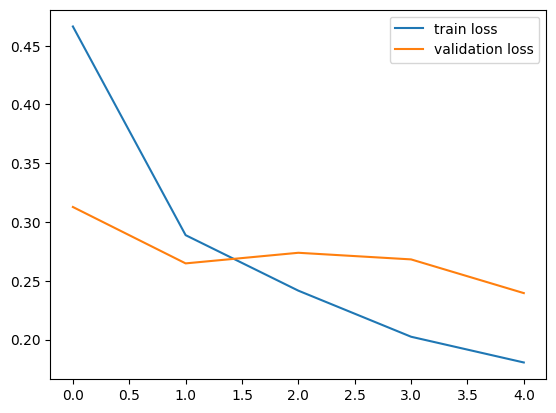

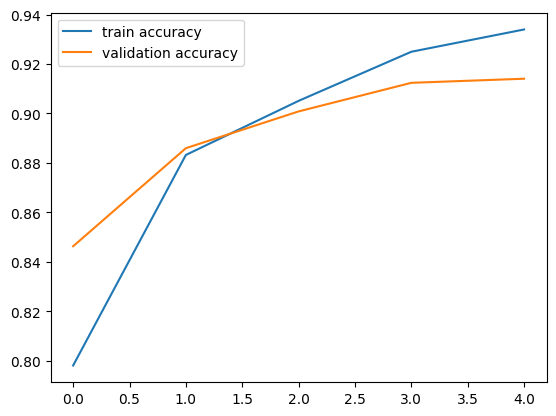

In [57]:
h = history
# h - for history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

loss decreases, accuracy increases

Predictive system

Path of the image to be predicted:/content/data/with_mask/with_mask_1003.jpg


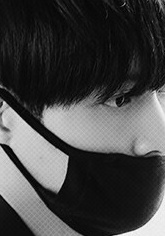

1/1 [==============================] - 0s 185ms/step
[[0.00841074 0.977776  ]]
1
The person in image is not wearing a mask


In [58]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==0:
  print('The person in the image is wearing a mask')
elif input_pred_label==1:
  print('The person in image is not wearing a mask')
else:
  print('The person ')